# Instruções Gerais

*   A atividade é **individual**. Cópias e plágios não serão tolerados
*   Data de entrega: **02/11/2021, até as 23:59h**

  * Apenas pelo **Classroom**
  * Façam uma cópia do notebook, e trabalhem nela para a entrega até o prazo definido
  * **Atentem para todos os pontos de `# TODO:`**, pois estes são os pontos de implementação
* Sobre política de atrasos: 
  * cada aluno terá a **tolerância de 2 dias de atraso, considerado todos os exercícios** propostos. 
  * A partir do terceiro dia, 60% da nota obtida será computada. 
  * Do quarto dia em diante, não será atribuída nota alguma.



# Atividade: K-Means

**Geração aleatória de dados iniciais**

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import numpy as np

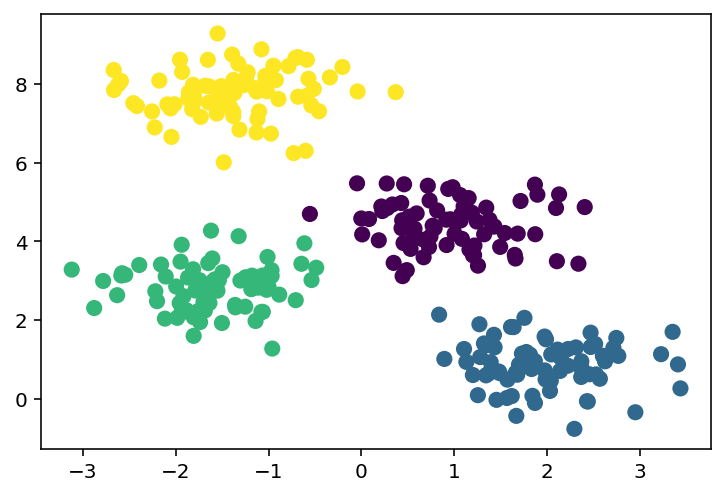

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')


**Implementação**

**TODO:** Implemente o algoritmo do k-means e o pipeline de treinamento e teste para os dados iniciais

In [3]:
class KMeans:

    def __init__(self, n_clusters=4):
        self.K = n_clusters

    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.K, replace=False)]
        self.intial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.prev_label) :
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self

    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return np.argmin(np.sqrt(np.sum((self.centroids - x)**2, axis=1)))

    def update_centroid(self, X):
        self.centroids = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])

In [4]:
kmeans = KMeans(n_clusters=4).fit(X)

**TODO:** Faça um novo *plot* os dados, considerando:

*   A utilização dos grupos preditos pelo algoritmo como referência (mudança no parâmetro `c` do `plt.scatter`)
*   O plot dos centroides sobre os dados



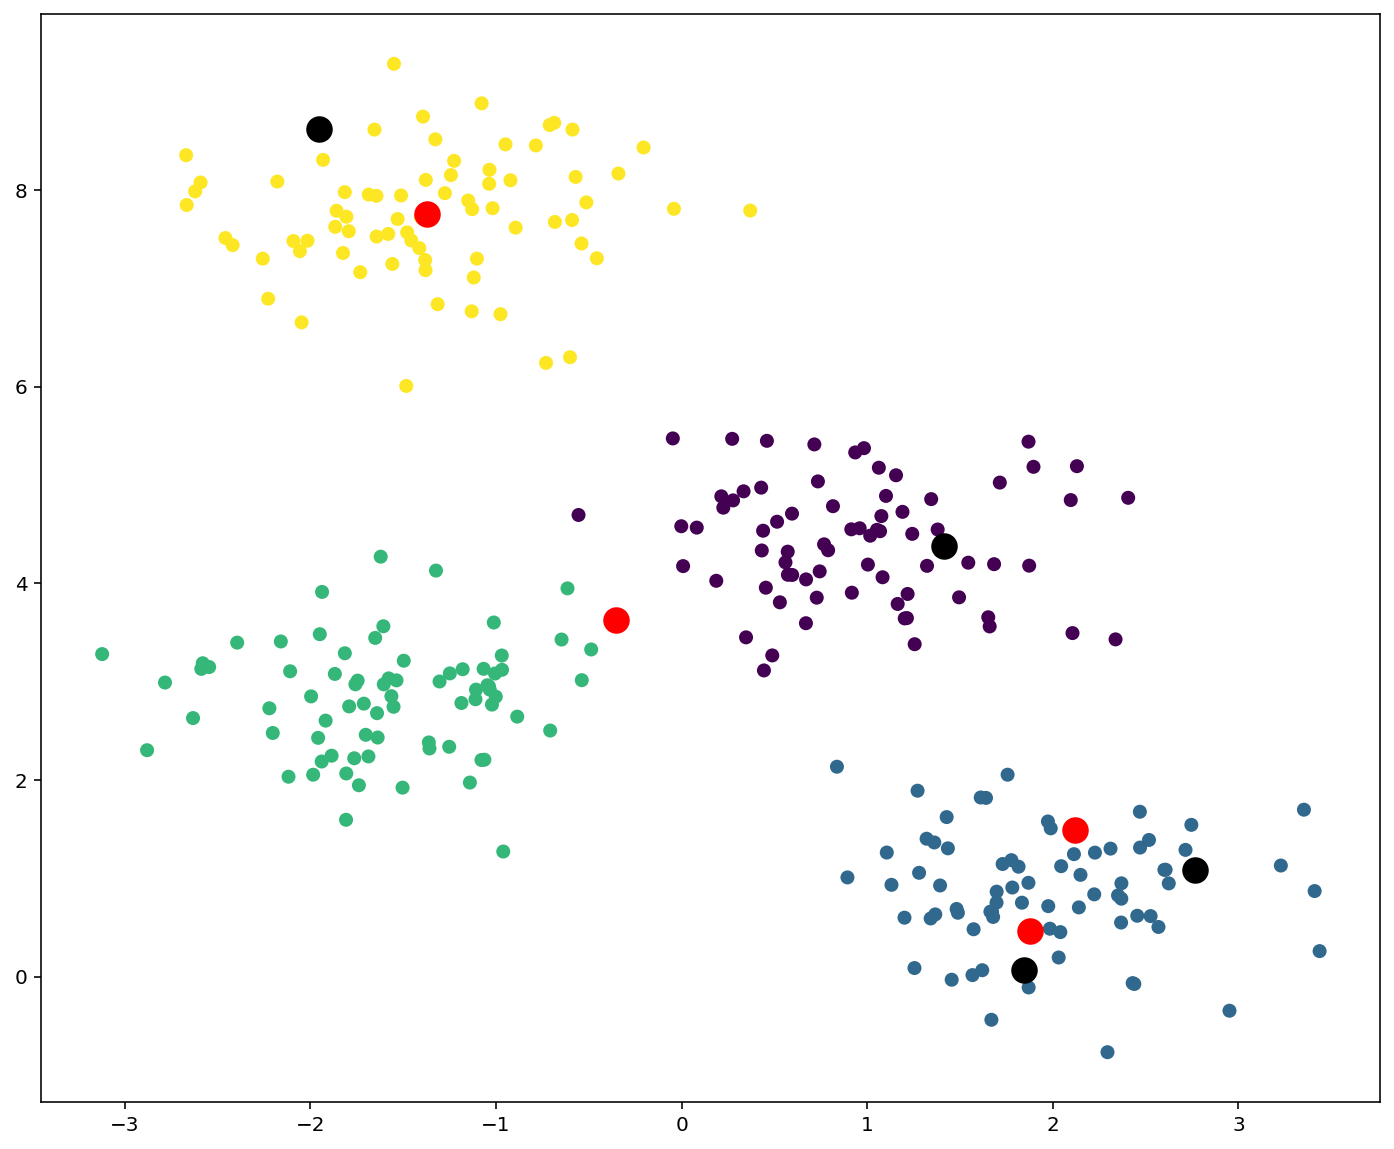

In [5]:
plt.figure(figsize=(12,10))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

##Centroids randomicamente gerados em preto, centroides finais em vermelho
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:,1], c='r', s=150)
plt.scatter(kmeans.intial_centroids[:, 0], kmeans.intial_centroids[:,1], c='k', s=150)

plt.show()

**Aplicação**

Agora, utilize o algoritmo implementado no dataset `digits`

`load_digits`

In [8]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

np.random.seed(0)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

**TODO:** treine o modelo para o dataset digits

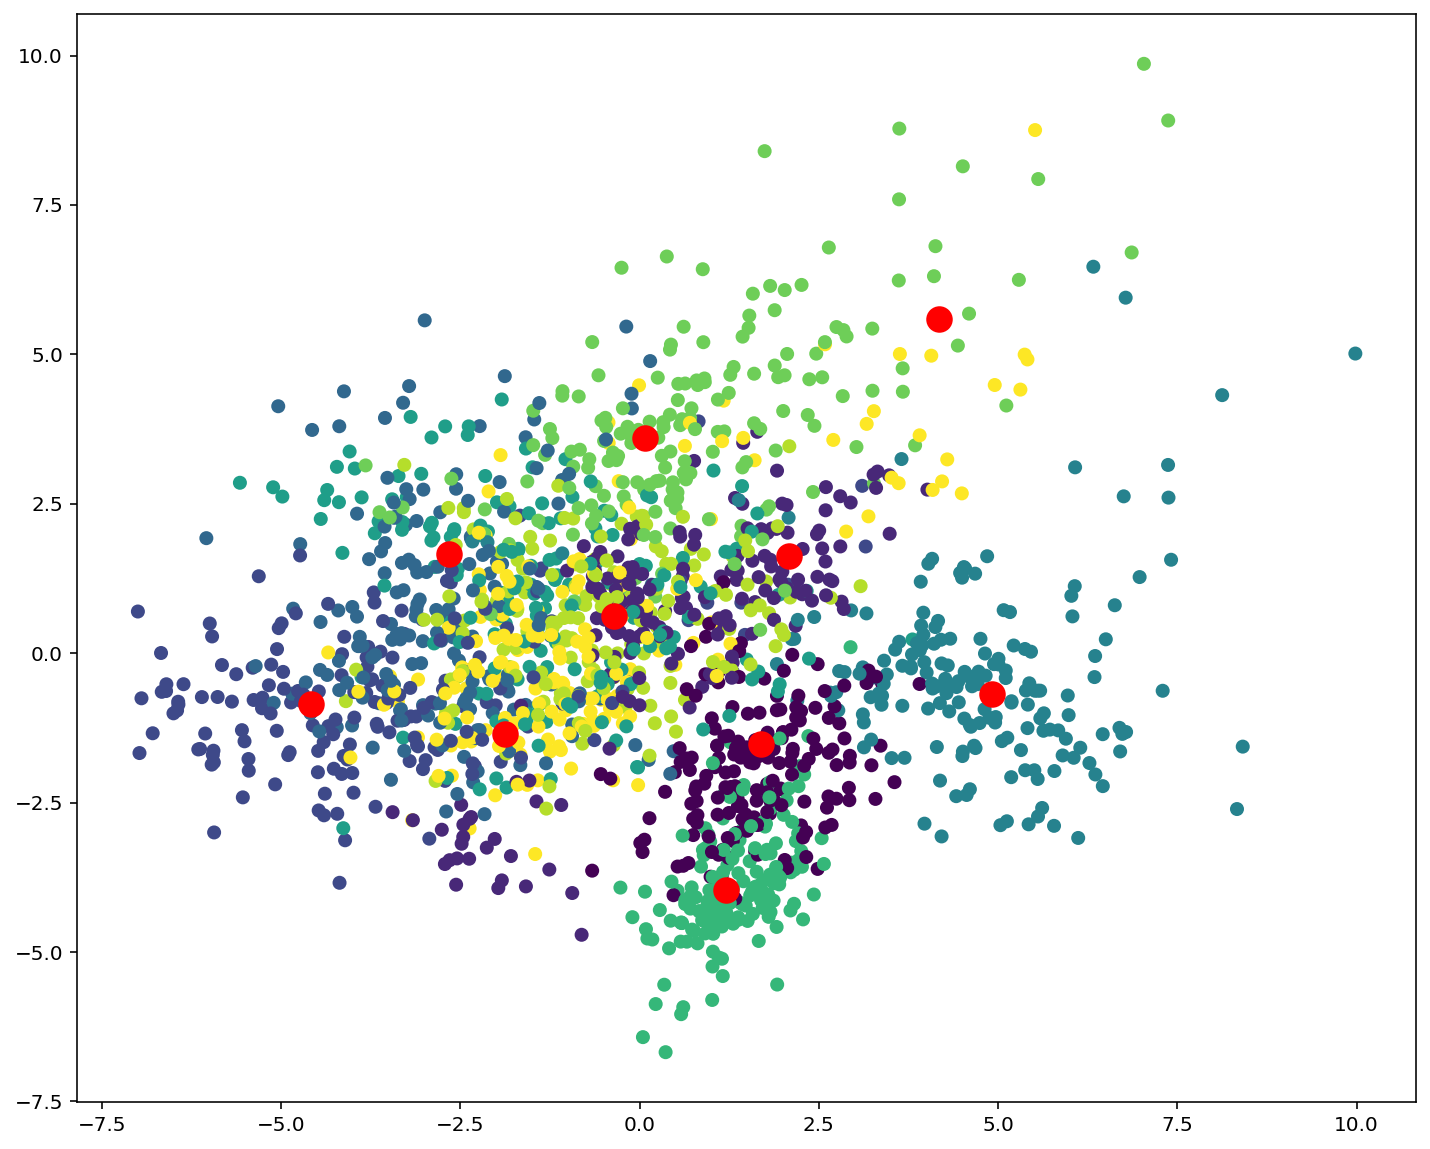

In [9]:
from sklearn.decomposition import PCA

h = .02
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=10).fit(reduced_data)

plt.figure(figsize=(12,10))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='o', c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:,1], c='r', s=150)
plt.show()